In [29]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from collections import Counter
import seaborn as sns
from PIL import Image

In [17]:
training_dir = "/kaggle/input/ucf-crime-dataset/Train"
test_dir = "/kaggle/input/ucf-crime-dataset/Test"

class_labels= ['Abuse','Arrest','Arson','Assault',
                'Burglary','Explosion','Fighting',
                "Normal",'RoadAccidents','Robbery',
                'Shooting','Shoplifting','Stealing',
                'Vandalism']
IMG_HEIGHT = 64
IMG_WIDTH = 64
SEED = 42
BATCH_SIZE = 64

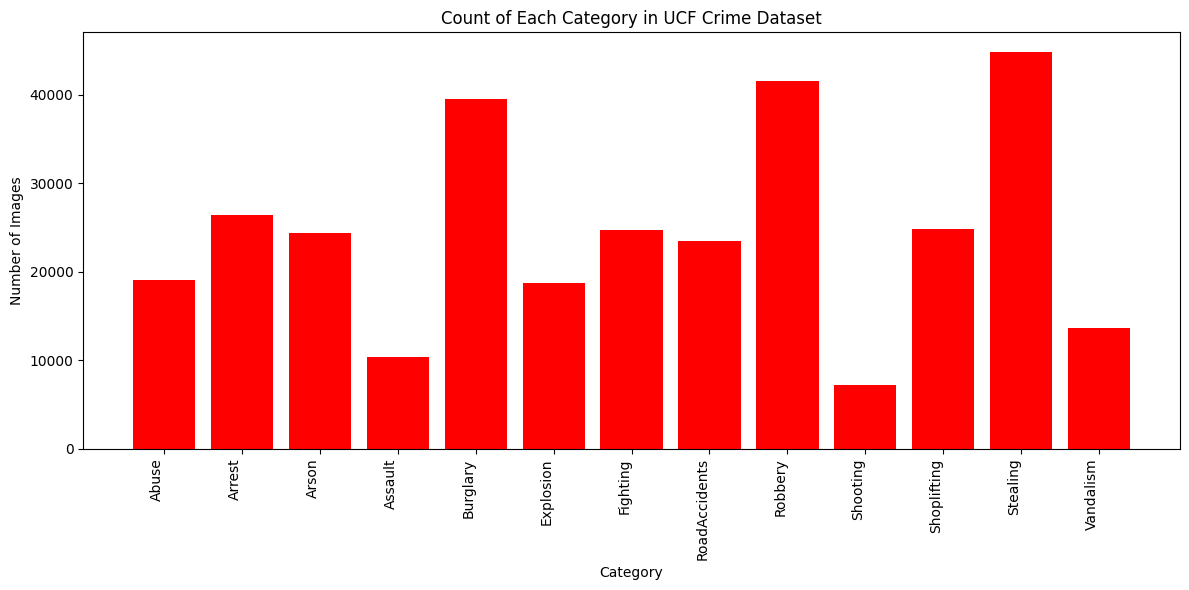

In [22]:
category_counts = Counter()

for label in class_labels:
    category_path = os.path.join(training_dir, label)
    if os.path.isdir(category_path):
        image_count = len([file for file in os.listdir(category_path) if file.endswith(('jpg', 'jpeg', 'png'))])
        category_counts[label] = image_count

plt.figure(figsize=(12, 6))
plt.bar(category_counts.keys(), category_counts.values(), color='red')
plt.xticks(rotation=90, ha='right')
plt.title("Count of Each Category in UCF Crime Dataset")
plt.xlabel("Category")
plt.ylabel("Number of Images")
plt.tight_layout()
plt.show()


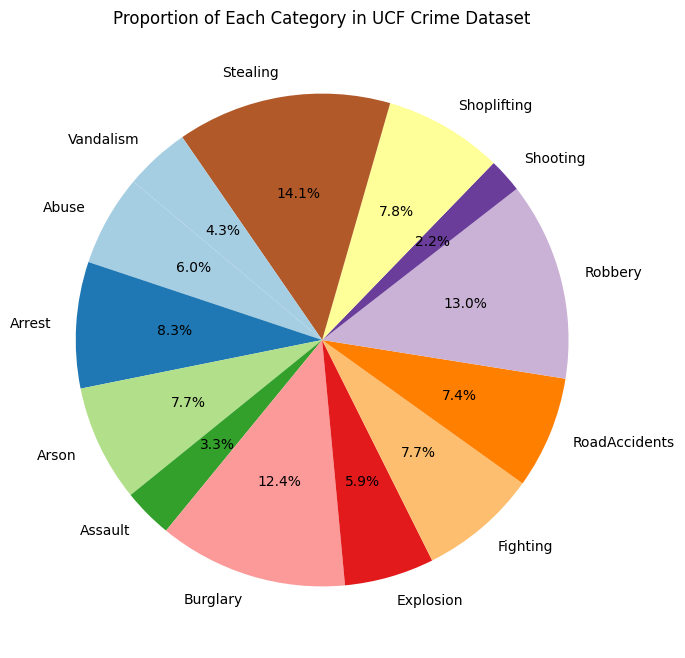

In [23]:
plt.figure(figsize=(8, 8))
plt.pie(category_counts.values(), labels=category_counts.keys(), autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Proportion of Each Category in UCF Crime Dataset")
plt.show()

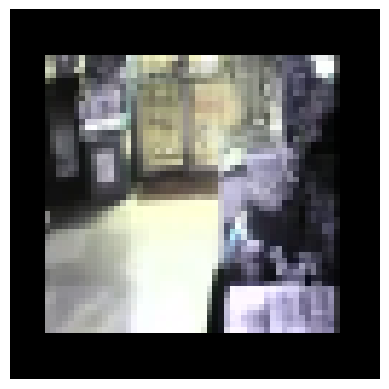

In [34]:
sample_dir = "/kaggle/input/ucf-crime-dataset/Train/Burglary/Burglary001_x264_100.png"
with Image.open(sample_dir) as im:
    plt.imshow(im)
    plt.axis('off')
    plt.show()

In [35]:
def video_count(folder_dir):
    video_set = set()
    
    for root, dirs, files in os.walk(folder_dir):
        for file in files:
            if file.endswith('.png'):
                video_number = file.split('_')[0]
                video_set.add(video_number)

    video_count = len(video_set)
    return video_count

folder_dir = "/kaggle/input/ucf-crime-dataset/Train/Arrest"
print(f"Number of unique videos: {video_count(folder_dir)}")

Number of unique videos: 45


In [38]:
folder_dir_arrest = "/kaggle/input/ucf-crime-dataset/Train/Arrest"
folder_dir_abuse = "/kaggle/input/ucf-crime-dataset/Train/Abuse"
folder_dir_arson = "/kaggle/input/ucf-crime-dataset/Train/Arson"
folder_dir_assault = "/kaggle/input/ucf-crime-dataset/Train/Assault"
folder_dir_burglary = "/kaggle/input/ucf-crime-dataset/Train/Burglary"
folder_dir_explosion = "/kaggle/input/ucf-crime-dataset/Train/Explosion"
folder_dir_fighting = "/kaggle/input/ucf-crime-dataset/Train/Fighting"
# folder_dir_normalvid = "/kaggle/input/ucf-crime-dataset/Train/NormalVideos"
folder_dir_roadacc = "/kaggle/input/ucf-crime-dataset/Train/RoadAccidents"
folder_dir_robbery = "/kaggle/input/ucf-crime-dataset/Train/Robbery"
folder_dir_shooting = "/kaggle/input/ucf-crime-dataset/Train/Shooting"
folder_dir_shoplifting = "/kaggle/input/ucf-crime-dataset/Train/Shoplifting"
folder_dir_stealing = "/kaggle/input/ucf-crime-dataset/Train/Stealing"
folder_dir_vandalism = "/kaggle/input/ucf-crime-dataset/Train/Vandalism"

all_dir = [folder_dir_arrest, folder_dir_abuse,folder_dir_arson,folder_dir_assault,folder_dir_burglary, folder_dir_explosion,
          folder_dir_fighting,folder_dir_roadacc, folder_dir_robbery, folder_dir_shooting, folder_dir_shoplifting, folder_dir_stealing, folder_dir_vandalism]

for direc in all_dir:
    print(f"Number of unique videos in {direc}:  {video_count(direc)}")


Number of unique videos in /kaggle/input/ucf-crime-dataset/Train/Arrest:  45
Number of unique videos in /kaggle/input/ucf-crime-dataset/Train/Abuse:  48
Number of unique videos in /kaggle/input/ucf-crime-dataset/Train/Arson:  41
Number of unique videos in /kaggle/input/ucf-crime-dataset/Train/Assault:  47
Number of unique videos in /kaggle/input/ucf-crime-dataset/Train/Burglary:  87
Number of unique videos in /kaggle/input/ucf-crime-dataset/Train/Explosion:  29
Number of unique videos in /kaggle/input/ucf-crime-dataset/Train/Fighting:  45
Number of unique videos in /kaggle/input/ucf-crime-dataset/Train/RoadAccidents:  127
Number of unique videos in /kaggle/input/ucf-crime-dataset/Train/Robbery:  145
Number of unique videos in /kaggle/input/ucf-crime-dataset/Train/Shooting:  27
Number of unique videos in /kaggle/input/ucf-crime-dataset/Train/Shoplifting:  29
Number of unique videos in /kaggle/input/ucf-crime-dataset/Train/Stealing:  95
Number of unique videos in /kaggle/input/ucf-crime-